In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.decomposition import PCA
import math
import sys
!{sys.executable} -m pip install joypy
import joypy
from matplotlib import cm
from scipy.stats import chi2_contingency, chi2


import sys
!{sys.executable} -m pip install git+https://github.com/el-hult/pyppca
from pyppca import ppca

import plotly.express as px


%matplotlib inline

  Cloning https://github.com/el-hult/pyppca to /tmp/pip-req-build-59h6s8z5
  Running command git clone -q https://github.com/el-hult/pyppca /tmp/pip-req-build-59h6s8z5
  Created wheel for pyppca: filename=pyppca-0.0.5-cp36-none-any.whl size=5117 sha256=bff81bfb164178f1bb9491b9eb824f7390cb3c0d01fbf9d23500f1b80e2f4cb8
  Stored in directory: /tmp/pip-ephem-wheel-cache-uqefjavh/wheels/92/65/8c/11571d744c63d148e35292b145d72dda494bb1f533e1c7ccfe
Successfully built pyppca


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = "drive/My Drive/COSIW/continuous.csv"
raw = pd.read_csv(filename, low_memory=False)

data= raw.copy(deep=True)

In [ ]:
## CREATING A DICTIONARY OF THE RACE VALUES

race_dict = {}
race_cols = []
race_arr = data['RANCEST']

for i in range(len(race_arr)):
  
  if race_arr[i]== 1 or race_arr[i]== 2 or race_arr[i]== 3 or race_arr[i]== 4:
    race_dict[i] = 'asian'
    race_cols.append('g')

  elif race_arr[i]== 5 or race_arr[i]==6 or race_arr[i]==7 or race_arr[i]==8:
    race_dict[i] = 'hispanic'
    race_cols.append('r')

  elif race_arr[i]== 9 or race_arr[i]== 10:
    race_dict[i] = 'black'
    race_cols.append('y')

  elif race_arr[i]== 11:
    race_dict[i] = 'white'
    race_cols.append('b')

  else:
    race_dict[i] = 'other'
    race_cols.append('p')

In [ ]:
#data = data.astype(float)

ValueError: ignored

In [ ]:
def PPCAMissingData(df, dimens=5):
  index = df.index.tolist()
  columns = df.columns.tolist()
  C, ss, M, X, Ye = ppca(df.to_numpy(copy=True),dimens,True) # dia=True
  # Ye is data if there was no missing data
  # 
  return C, ss, M, X, Ye #(pd.DataFrame(data=X, index=index))

In [ ]:
C, ss, M, X, Ye = PPCAMissingData(data)


Objective: 8722740.05, Relative Change 1.00000
Objective: 8708881.88, Relative Change 0.00159
Objective: 8313364.66, Relative Change 0.04542
Objective: 8094505.64, Relative Change 0.02633
Objective: 7892586.73, Relative Change 0.02495
Objective: 7694677.97, Relative Change 0.02508
Objective: 7498516.77, Relative Change 0.02549
Objective: 7303240.29, Relative Change 0.02604
Objective: 7108452.23, Relative Change 0.02667
Objective: 6913949.46, Relative Change 0.02736
Objective: 6719621.22, Relative Change 0.02811
Objective: 6525405.99, Relative Change 0.02890
Objective: 6331271.23, Relative Change 0.02975
Objective: 6137203.72, Relative Change 0.03065
Objective: 5943205.73, Relative Change 0.03161
Objective: 5749295.12, Relative Change 0.03263
Objective: 5555509.14, Relative Change 0.03371
Objective: 5361912.54, Relative Change 0.03485
Objective: 5168611.60, Relative Change 0.03605
Objective: 4975777.09, Relative Change 0.03731
Objective: 4783680.45, Relative Change 0.03861
Objective: 45

In [ ]:
data["RANCEST"]

0        4.0
1        6.0
2        2.0
3        7.0
4        8.0
        ... 
11044    9.0
11045    9.0
11046    9.0
11047    9.0
11048    9.0
Name: RANCEST, Length: 11049, dtype: float64

In [ ]:
index = data.index.tolist()
pca_df = pd.DataFrame(data=X, index=index)

n_components = 4

labels = {str(i): f"PC {i+1}" for i in range(n_components)}



fig = px.scatter_matrix(
    pca_df,
    dimensions=range(n_components),
    labels=labels,
    color = race_cols
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
def label_race(id:int)->str:  
  if id in [1, 2, 3, 4]:
    return 'asian'
  elif id in [5, 6, 7, 8]:
    return'hispanic'
    
  elif id in [9, 10]:
    return 'black'

  elif id == 11:
    return 'white'

  else:
    return 'other'

data["RANCEST"] = data["RANCEST"].apply(label_race)

In [ ]:
## STIGMA VARS

# V04341 If serious emot problem, probability of going to professional
# V04342 Comfort level of talking to prof about personal problems
# V04343 Embarrass level if friends knew getting prof help for emotions
# V04344 Percent people helped who see prof for serious emotional problems
# V04345 Percent people who get better without professional help
# V05631 During difficult times-seek comfort in religion (?)

names = {
    #"prob_comf_talk_prof": "prob_comf_talk_prof",
    "comf_talk_prof": "comf_talk_prof",
    "prob_talk_prof": "prob_talk_prof",
    "V04343": "embar_talk_prof",
    "V04344": "%_helpful_talk_prof",
    "V04345": "%_better_without_prof",
    "V05631": "religion_comfort",
    "RANCEST": "RANCEST"
}


data[names.values()]

,comf_talk_prof,prob_talk_prof,embar_talk_prof,%_helpful_talk_prof,%_better_without_prof,religion_comfort,RANCEST
0,2.0,2.0,3.0,NaN,NaN,2.0,4
1,1.0,2.0,2.0,NaN,NaN,1.0,4
2,1.0,1.0,4.0,NaN,NaN,1.0,4
3,1.0,1.0,4.0,NaN,NaN,1.0,6
4,4.0,3.0,4.0,NaN,NaN,2.0,6
...,...,...,...,...,...,...,...
20008,NaN,NaN,NaN,NaN,NaN,NaN,9
20009,NaN,NaN,NaN,NaN,NaN,NaN,8
20010,NaN,NaN,NaN,NaN,NaN,NaN,9
20011,NaN,NaN,NaN,NaN,NaN,NaN,9


In [ ]:
def label_race(id:int)->str:  
    if id in [1, 2, 3, 4]:
        return 'asian'
    elif id in [5, 6, 7, 8]:
        return'hispanic'

    elif id in [9, 10]:
        return 'black'

    elif id == 11:
        return 'white'

    else:
        return 'other'

data["RANCEST"] = data["RANCEST"].apply(label_race)

In [ ]:
data.head() ## FIX CONTINUOUS REMOVE BINS

,work_status,children_HH,adults_HH,V00995,professional_seen,age_talk_prof,recieved_helpful_treatment,total_profs_seen_1,treatment_past_12mthns,V01012,hospitalized_depression,stopped_seeing_prof,completed_treatment,#_diff_pre_meds,#_diff_nonpre_meds,nonpre_meds_taken_1,nonpre_meds_taken_2,anti_depress_12mnth,tranquil_12mnth,amphetanines_12mnth,anti_psychotic_12mnth,ins_military,ins_obtained_employer,ins_purchased_company,ins_medicare,ins_supp_medigap,ins_government_prog,ins_state_health,ins_other,ins_certain_doc_req,comm_care_own_lang,interp_available,cost_routine_checkup,cost_perscrip_medicine,difficult_appointment_phone,difficult_referral_specialist,provider_spends_limited_time,1_hr_waiting_room,difficult_advice_phone,difficult_going_clinic,...,V06620,V06621,tried_get_prof_help,seen_psychiatrist,seen_mental_prof,seen_family_doc,seen_other_med_doc,seen_other_health_prof,seen_religious_advisor,seen_other_healer,treatment_revieved,seen_family_friends,V10047,%_helpful_talk_prof,%_better_without_prof,child_died,imp_religion,non_english_home_lang,also_english,neighborhood,lived_biolog_parents,left_unsupervised,went_hungry,failed_go_doc,religion,US_born,primary_secondary_adult,depression_tendency,psychiatrist,MD,social worker,counselor,non-MD,spiritual advisor,healer,psychologist,depress_diagnos,identify_ethnicity,employment,nonpre_meds_taken
0,1.0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,5.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,NaN,10-16,16-20,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1
1,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,10-16,NaN,0.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1
2,3.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN,NaN,16-20,16-20,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1
3,1.0,0,2,1.0,4.0,25-50,1.0,2.0,0.0,1.0,0.0,NaN,NaN,4.0,3.0,5.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,5-10,10-16,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1
4,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,5.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,NaN,5-10,10-16,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1.0,1


In [ ]:
black = data[["RANCEST", "%_helpful_talk_prof"]][data.RANCEST == 'black']
print("Black percentage of help: " + str(np.nanmean(black["%_helpful_talk_prof"])))

TypeError: ignored

In [ ]:
white = data[["RANCEST", "%_helpful_talk_prof"]][data.RANCEST == 'white']
print("White percentage of help: " + str(np.nanmean(white["%_helpful_talk_prof"])))

White percentage of help: 52.47840290381125


In [ ]:
asian = data[["RANCEST", "%_helpful_talk_prof"]][data.RANCEST == 'asian']
print("Asian percentage of help: " + str(np.nanmean(asian["%_helpful_talk_prof"])))

Asian percentage of help: 51.08510638297872


In [ ]:
hispanic = data[["RANCEST", "%_helpful_talk_prof"]][data.RANCEST == 'hispanic']
print("Hispanic percentage of help: " + str(np.nanmean(hispanic["%_helpful_talk_prof"])))

Hispanic percentage of help: 54.86666666666667


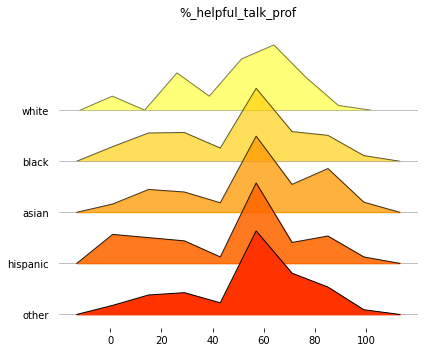

In [ ]:
labels = ['white', 'black', 'asian', 'hispanic', 'other']

fig, axes = joypy.joyplot(data, by="RANCEST", column="%_helpful_talk_prof", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(6,5),
                          title="%_helpful_talk_prof",
                          kind="normalized_counts", colormap=cm.autumn_r)

In [ ]:
# Groups Counts - 26/12/2020

cols = ["V00995", "%_helpful_talk_prof", "embar_talk_prof", "religion_comfort", "RANCEST"]
dummy = data.copy(deep=True)

filled_data = dummy.dropna(axis=0, subset=cols)

dummy["helpful_talk_prof"] = dummy["%_helpful_talk_prof"].apply(lambda x: 1 if x > 50 else 0)
counts = dummy.groupby(cols, as_index=False).size()

In [ ]:
counts

,V00995,%_helpful_talk_prof,embar_talk_prof,religion_comfort,RANCEST,size
0,0.0,0.0,1.0,1.0,black,1
1,0.0,0.0,1.0,2.0,black,1
2,0.0,0.0,1.0,2.0,other,1
3,0.0,0.0,3.0,1.0,white,1
4,0.0,0.0,4.0,1.0,black,1
...,...,...,...,...,...,...
653,1.0,100.0,4.0,1.0,white,4
654,1.0,100.0,4.0,2.0,hispanic,1
655,1.0,100.0,4.0,2.0,white,3
656,1.0,100.0,4.0,3.0,black,1


In [ ]:
def heatmap(df, race, cols):
  df_new = df[cols][df.RANCEST == race]
  df_new.drop(columns='RANCEST', inplace=True)
  df_new.dropna(axis=0)
  sns.heatmap(df_new.corr(), annot = True)

  

In [ ]:
cols = ["V00995", "%_helpful_talk_prof", "embar_talk_prof", "religion_comfort", "RANCEST"]

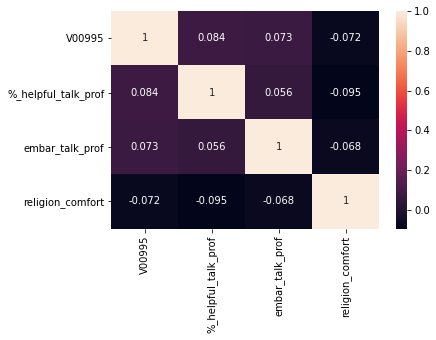

In [ ]:
heatmap(data, 'white', cols)

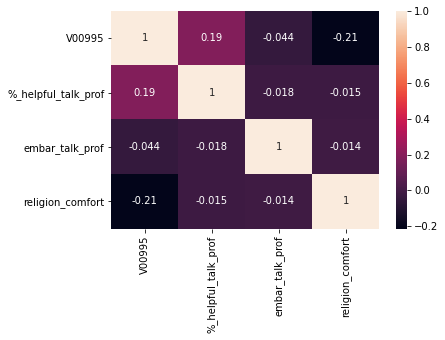

In [ ]:
heatmap(data, 'black', cols)

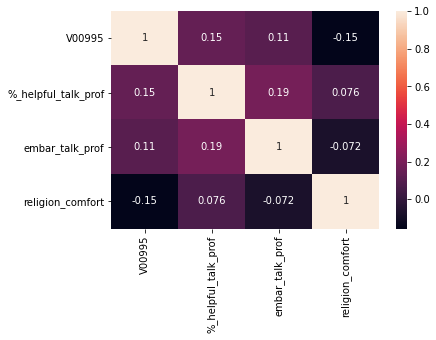

In [ ]:
heatmap(data, 'asian', cols)

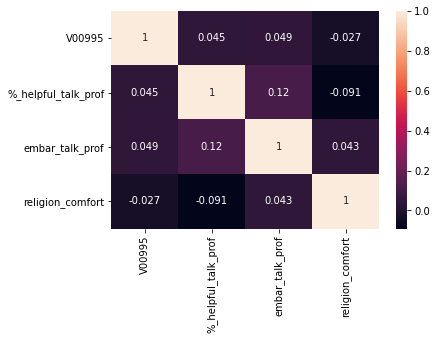

In [ ]:
heatmap(data, 'hispanic', cols)